In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from zipfile import ZipFile

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentials=json.load(open('/content/kaggle (1).json'))

In [ ]:
os.environ['KAGGLE_USERNAME']=kaggle_credentials['username']
os.environ['KAGGLE_KEY']=kaggle_credentials['key']

In [ ]:
#!/bin/bash
!kaggle datasets download vjchoudhary7/customer-segmentation-tutorial-in-python

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other


In [ ]:
with ZipFile ('customer-segmentation-tutorial-in-python.zip','r') as zip_ref:
  zip_ref.extractall()

In [ ]:
data=pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.shape

(200, 5)

In [ ]:
#Renaming the columns
data = data.rename(columns={'Annual Income (k$)': 'AnnualIncome'})
data=data.rename(columns={'Spending Score (1-100)':'SpendingScore'})

In [ ]:
data.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Label encoding Gender
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [ ]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


In [ ]:
X = data[['Age', 'AnnualIncome', 'SpendingScore', 'Gender']]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

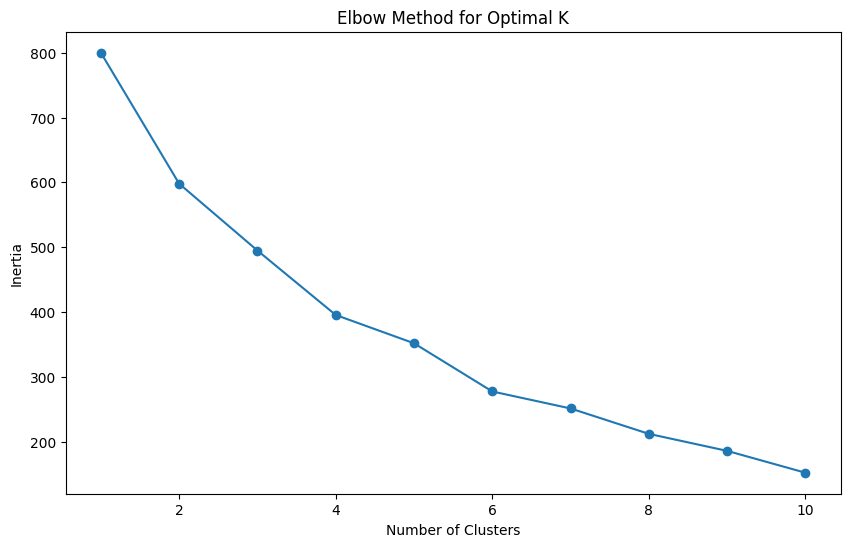

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Number of optimal clusters found at elbow point

Here Number of clusters--> 5

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [ ]:
data['Cluster'] = clusters

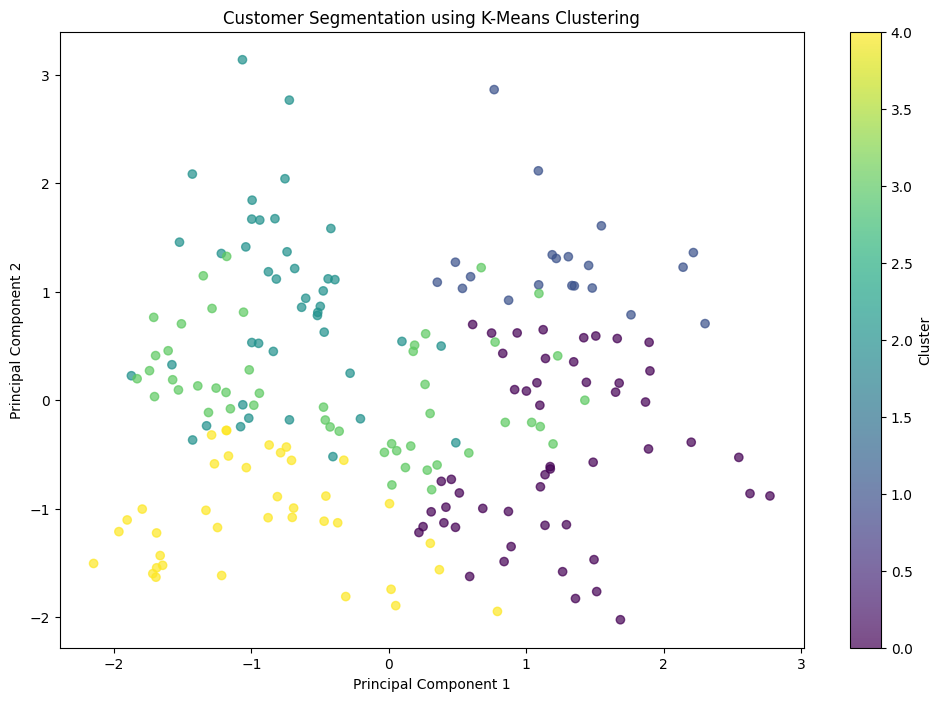

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1],
                      c=clusters, cmap='viridis', alpha=0.7)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [ ]:
cluster_analysis = data.groupby('Cluster').agg({
    'Age': 'mean',
    'AnnualIncome': 'mean',
    'SpendingScore': 'mean',
    'Gender': lambda x: x.mode()[0]
}).round(1)

print("\nCluster Characteristics:")
print(cluster_analysis)


Cluster Characteristics:
          Age  AnnualIncome  SpendingScore  Gender
Cluster                                           
0        56.5          46.1           39.3       1
1        39.5          85.2           14.0       1
2        28.7          60.9           70.2       1
3        37.9          82.1           54.4       0
4        27.3          38.8           56.2       0


Analysis of the 5 cluster groups




*   Cluster 0 --> These customers appear to be older males with modest income who are conservative with their spending, possibly focused on saving or essential purchases only **(Senior Conservative Spenders)**

*   Cluster 1 --> This segment represents wealthy males who earn significantly but spend very little, suggesting they may be focused on saving/investing rather than consumption **(Affluent Non-Spenders)**

*   Cluster 2--> These are young professional males with decent earnings who enjoy spending their money. **(Young Active Spenders)**

*   Cluster 3--> This segment consists of high-earning females who maintain balanced spending habits. **(Affluent Balanced Spenders)**

*   Cluster 4--> These young female customers have limited income but moderate spending **(Young Value-Conscious Customers)**










In [ ]:
# Export with cluster labels
data.to_csv('segmented_customers.csv', index=False)

